In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/Shareddrives/Tree of Life Project"

'Copy of Project Brief and Workplan Assignment_Fall 2025 AI Studio.pdf'
'Feature Engg- Naman.gdoc'
'TOLCC Break Through Tech Dataset.xlsx'
 TOL_project.ipynb


In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/drive/Shareddrives/Tree of Life Project/TOLCC Break Through Tech Dataset.xlsx"

# Load all sheets
sheets = pd.ExcelFile(file_path).sheet_names
print("Sheets:", sheets)


Sheets: ['Manual CRM Sept. 2024-Mar. 2025', 'Smartsheets CRM April 2025-June', 'Smartsheets June 20,2025-July 9']


In [ ]:
# Combine all the Excel sheets into one DataFrame

dfs = []
for sheet in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Standardize column names (lowercase, remove spaces)
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    df['sheet_name'] = sheet
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

print(data.shape)
print(data.columns)
data.head()

(1964, 17)
Index(['intake_method', 'unnamed:_1',
       'please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.',
       'age', 'town', 'insurance_carrier', 'appointment_location',
       'appointment_type', 'if_talk_therapy,_specifically_what_type?',
       'appointment_time', 'unnamed:_10', 'unnamed:_11', 'sheet_name',
       'lead_source_category', 'lead_source',
       'referring_provider_name_(if_other,_please_specify)',
       'preferred_appointment_time'],
      dtype='object')


,intake_method,unnamed:_1,"please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.",age,town,insurance_carrier,appointment_location,appointment_type,"if_talk_therapy,_specifically_what_type?",appointment_time,unnamed:_10,unnamed:_11,sheet_name,lead_source_category,lead_source,"referring_provider_name_(if_other,_please_specify)",preferred_appointment_time
0,Call,Bariatric Doctor,Bariatric Doctor,25-30,Elizabeth,BCBS,Virtual,Talk Therapy,Bariatric Evaluation,Evening (4-8),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
1,Call,Family/Friend,Mom,10-15,Summit,United Healthcare,Virtual,Talk Therapy,Individual (minor),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
2,Boom Form,Family/Friend,Friend,20-25,Monroe,BCBS,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
3,Boom Form,Family/Friend,NaN,25-30,Ocean,BCBS,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN
4,Boom Form,Family/Friend,NaN,30-35,Jackson,Aetna,Freehold,Talk Therapy,Individual (adult),Afternoon (12-4),NaN,NaN,Manual CRM Sept. 2024-Mar. 2025,NaN,NaN,NaN,NaN


In [ ]:
# Drop unnecessary columns
drop_cols = [
    'unnamed:_1',
    'unnamed:_10',
    'unnamed:_11',
    "please_be_specific_on_who_sent_you_our_way,_we'd_like_to_thank_them.",
    "referring_provider_name_(if_other,_please_specify)",
    "sheet_name"
]

data = data.drop(columns=drop_cols, errors='ignore')

print(data.shape)
print(data.columns)

(1964, 11)
Index(['intake_method', 'age', 'town', 'insurance_carrier',
       'appointment_location', 'appointment_type',
       'if_talk_therapy,_specifically_what_type?', 'appointment_time',
       'lead_source_category', 'lead_source', 'preferred_appointment_time'],
      dtype='object')


In [ ]:
# shorten column names for readability

data = data.rename(columns={
    'intake_method': 'intake',
    'insurance_carrier': 'insurance',
    'appointment_location': 'location',
    'appointment_type': 'appt_type',
    'if_talk_therapy,_specifically_what_type?': 'therapy_type',
    'appointment_time': 'appt_time',
    'lead_source_category': 'lead_cat',
    'lead_source': 'lead_source',
    'preferred_appointment_time': 'preferred_time'
})

print(data.columns)


Index(['intake', 'age', 'town', 'insurance', 'location', 'appt_type',
       'therapy_type', 'appt_time', 'lead_cat', 'lead_source',
       'preferred_time'],
      dtype='object')


In [ ]:
# Check for null values

data.isnull().sum().sort_values(ascending=False)



,0
preferred_time,1733
lead_source,1731
lead_cat,1378
therapy_type,1034
town,933
insurance,931
age,431
appt_time,415
intake,195
location,184


In [ ]:
# dropping 'preferred_time', 'lead_source', 'lead_cat' because 88% of data is missing.
# too sparse to be useful
drop_cols = ['preferred_time', 'lead_source', 'lead_cat']
data = data.drop(columns=drop_cols)

In [ ]:
# Converting all values to lowercase to maintain efficiency

data = data.map(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
for col in ['appt_type', 'insurance']:
  print(col)
  print(data[col].unique())
  print("----")

appt_type
['talk therapy' 'medication management' nan
 'talk therapy\nmedication management' 'updating paperwork'
 'both talk therapy & medication management' 'self-pay talk therapy'
 'talk therapy & medication management' 'updating insurance'
 'self-pay med management']
----
insurance
['bcbs' 'united healthcare' 'aetna' 'cigna' 'meritain' 'highmark'
 'magnacare' 'other' 'umr' 'medicare' 'quest' 'amerihealth' 'optum'
 'oxford' nan 'emblem health' 'surest united healthcare']
----


In [ ]:
# Fill missing values of insurance with 'other'
'''     Assumption: All clients are referred using some insurance
        otherwise they are self-pay, which can be confirmed by seeing self-pay in appt_type
'''

data['insurance'] = data['insurance'].fillna('other')

In [ ]:
# Converting insurance to 'none' where people are self-paying
# The people who are self paying has 'appt_type' starting with 'self-pay'

mask = data['appt_type'].str.startswith('self-pay', na=False)

# Extract the appt_type part (everything after "self-pay") for the matching records
new_types = data.loc[mask, 'appt_type'].str.replace('self-pay ', '')

# Change the 'insurance' column to "none" for matching records
data.loc[mask, 'insurance'] = 'none'

# Change the 'appt_type' column to the extracted appt_type value for matching records
data.loc[mask, 'appt_type'] = new_types

In [ ]:
# Fill missing values (categorical) with "Unknown"
remaining_cat_cols = ['therapy_type', 'town', 'age', 'intake', 'location', 'appt_type']
for col in remaining_cat_cols:
    data[col] = data[col].fillna("unknown")

# Drop rows with missing target
data = data.dropna(subset=['appt_time'])

print(data.isnull().sum())


intake          0
age             0
town            0
insurance       0
location        0
appt_type       0
therapy_type    0
appt_time       0
dtype: int64


In [ ]:
# Examining appt_type

print(data['appt_type'].unique())

['talk therapy' 'medication management' 'updating paperwork'
 'both talk therapy & medication management'
 'talk therapy & medication management' 'updating insurance'
 'med management']


In [ ]:
# Cleaning appt_type column by
'''
1. Replacing "both talk therapy & medication management" with "talk therapy & med management"
2. Replacing "medication management" with "med management"
3. Replacing "talk therapy & medication management" with "talk therapy & med management"
'''
col_edit = 'appt_type'

data[col_edit] = data[col_edit].str.replace('^both ', '', regex=True)

data[col_edit] = data[col_edit].str.replace('medication management', 'med management', regex=False)

data[col_edit] = data[col_edit].str.replace('talk & medication management', 'talk & med management', regex=False)

# The rest of the values will remain unchanged

In [ ]:
# Examining therapy_type

print(data['therapy_type'].unique())

['bariatric evaluation' 'individual (minor)' 'individual (adult)'
 'unknown' 'couples' 'family' '\u200b']


In [ ]:
col_edit = 'therapy_type'

data[col_edit] = data[col_edit].replace('\u200b', 'unknown', regex=False)

In [ ]:
# Examining appt_time

print(data['appt_time'].unique())

['evening (4-8)' 'afternoon (12-4)' 'morning (9-12)' '5:00 pm' '2:00 pm'
 '3:00 pm' '11:00 am' '12:00 pm' '6:00 pm' '1:00 pm' '9:00 am' '10:00 am'
 '3:40 pm' '5:30 pm' '4:00 pm' '6:30 pm' '9:40 am' '7:00 pm' '9:30 am'
 '12:30 pm' '3:20 pm' '8:00 am' '11:30 am' '1:20 pm' '10:20 am' '7:30 pm'
 '3:30 pm' '1:30 pm']


In [ ]:
# Categorizing time appropriately as per 3 bins: morning, afternoon and evening

old_col = 'appt_time'
new_col = 'appt_time_category'

# Defining conditions

# Morning: if it contains "am"
cond_morning = data[old_col].str.contains('am', na=False)

# Afternoon (12-4 PM): covers 12:xx pm and 1:xx pm through 4:xx pm.
cond_afternoon = data[old_col].str.match(r'^(12|[1-4]):\d{2} pm', na=False)

# Evening (5-8 PM): covers 5:xx pm through 8:xx pm.
cond_evening = data[old_col].str.match(r'^[5-8]:\d{2} pm', na=False)

# Categorization
choices = [
    'morning (9-12)',
    'afternoon (12-4)',
    'evening (4-8)'
]

conditions = [
    cond_morning,
    cond_afternoon,
    cond_evening
]

# The default value is the original column value, leaving existing bins unchanged.
default_value = data[old_col]

data[new_col] = np.select(conditions, choices, default=default_value)

In [ ]:
# Dropping old time column and renaming new column with the old column name

data.drop(columns=[old_col], inplace=True)
data.rename(columns={new_col: old_col}, inplace=True)

In [ ]:
# Examining age

data['age'].unique()

array(['25-30', '10-15', '20-25', '30-35', 'unknown', '15-20', '60-65',
       '40-45', '1-5', '5-10', '50-55', '55-60', '35-40', '65-70',
       '35-40; 35-40', '50-55; 45-50', '25-30; 30-35', '50-55; 50-55',
       '30-35; 40-45', '30-35; 30-35', '45-50; 40-45', '55--60', '75-80',
       '70-75', '80-85', '85-90', '35-40; 40-45', '65-70; 65-70',
       '40-45; 50-55', '55-60; 55-60', '25-20', '45-50; 45-50',
       '60-65; 55-60', '55-60; 60-65', '45-50', '30-35; 25-30',
       '40-45; 35-40', '25-30; 25-30', '40-45; 40-45', '55-60; 50-55',
       '35-40; 30-35', '60-65; 60-65', '25-30; 20-25', '30-35; 35-40',
       '45-50; 50-55'], dtype=object)

In [ ]:
# converts data like '25--30' to '25-30' to maintain integrity

data['age'] = data['age'].str.replace(r'-+', '-', regex=True)

In [ ]:
# Generalize the multi-age record by splitting and duplicating rows

# Creating new feature which specifies if the person is attending session with someone else or alone
data['duo_attendee'] = np.where(data['age'].str.contains(';'), 1, 0)

# Splitting age entries by ';'
data['age'] = data['age'].str.split('; ')

# Exploding the DataFrame, creating a new record for each age range found in the list
data = data.explode('age', ignore_index=True)

In [ ]:
# Converting the age '25-20' to '20-25'

data['age'] = data['age'].replace('25-20', '20-25')

In [ ]:
# Confirming continuity of all features before moving forward:

for col in data.columns:
  print(f"Column name is :{col}")
  print(f"Unique values are: {data[col].unique()}")
  print(f"Number of unique values are {data[col].nunique()}")
  print("----")

Column name is :intake
Unique values are: ['call' 'boom form' 'text' 'other' 'waitlist' 'unknown' 'boom' 'virtual']
Number of unique values are 8
----
Column name is :age
Unique values are: ['25-30' '10-15' '20-25' '30-35' 'unknown' '15-20' '60-65' '40-45' '1-5'
 '5-10' '50-55' '55-60' '35-40' '65-70' '45-50' '75-80' '70-75' '80-85'
 '85-90']
Number of unique values are 19
----
Column name is :town
Unique values are: ['elizabeth' 'summit' 'monroe' 'ocean' 'jackson' 'oradell' 'ewing'
 'passaic' 'monmouth beach' 'hamilton' 'freehold' 'princeton junction'
 'plainsboro' 'millstone' 'cream ridge' 'old bridge' 'manalapan' 'matawan'
 'cliffwood' 'mantoloking' 'east brunswick' 'princeton' 'toms river'
 'lawrence township' 'brick' 'morganville' 'long branch' 'clearwater'
 'new brunswick' 'howell' 'south amboy' 'cranbury' 'east windsor'
 'point pleasant' 'allentown' 'kendall park' 'bordentown' 'englishtown'
 'vorhees' 'trenton' 'mount royal' 'hewitt' 'farmingdale' 'hopewell'
 'oceanport' 'spring

In [ ]:
#this shows how many morning vs non-morning appointments the dataset has

def map_time_slot(x):
    if "morning" in str(x):
        return 1
    else:
        return 0

data['is_morning'] = data['appt_time'].apply(map_time_slot)

print(data['is_morning'].value_counts())
print(data['is_morning'].value_counts(normalize=True))


is_morning
0    1204
1     402
Name: count, dtype: int64
is_morning
0    0.749689
1    0.250311
Name: proportion, dtype: float64


In [ ]:
# One-hot encode categorical predictors
X = pd.get_dummies(data.drop(columns=['appt_time', 'is_morning']), drop_first=True)
y = data['is_morning']

print(X.shape)
X.head()


(1606, 244)


,duo_attendee,intake_boom form,intake_call,intake_other,intake_text,intake_unknown,intake_virtual,intake_waitlist,age_10-15,age_15-20,...,location_virtual,appt_type_talk therapy,appt_type_talk therapy & med management,appt_type_updating insurance,appt_type_updating paperwork,therapy_type_couples,therapy_type_family,therapy_type_individual (adult),therapy_type_individual (minor),therapy_type_unknown
0,0,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,0,False,True,False,False,False,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
2,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
# Hakim - Logistic Regression & KNN
# Naman - Random Forest & Decision Tree
# Alvisa - GDBT
# Blessing - visualization

Feature matrix shape: (1606, 244)
Target positive rate overall: 0.25
Train size: (1076, 244), Test size: (530, 244)
Positive rate (train): 0.250 | Positive rate (test): 0.251

Baseline performance
ROC AUC: 0.668
              precision    recall  f1-score   support

           0      0.749     1.000     0.857       397
           1      0.000     0.000     0.000       133

    accuracy                          0.749       530
   macro avg      0.375     0.500     0.428       530
weighted avg      0.561     0.749     0.642       530



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


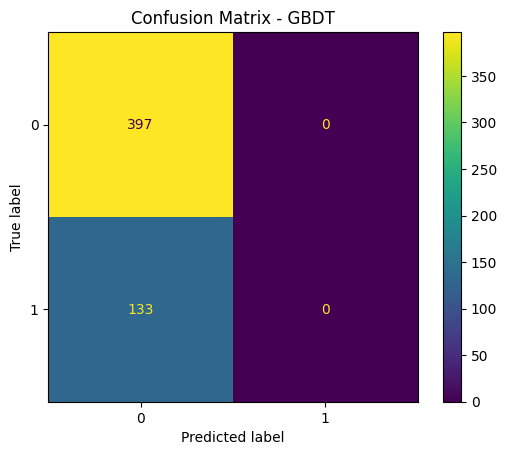

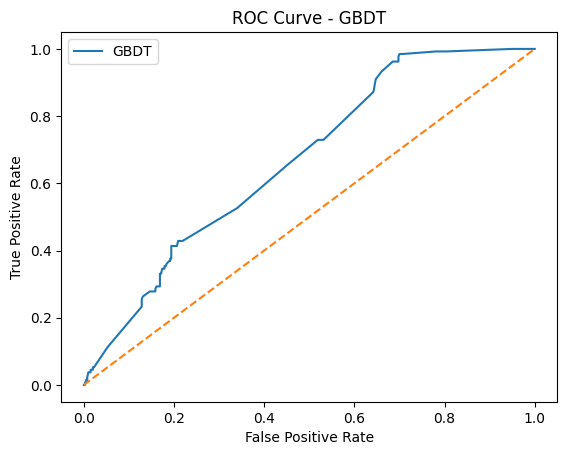

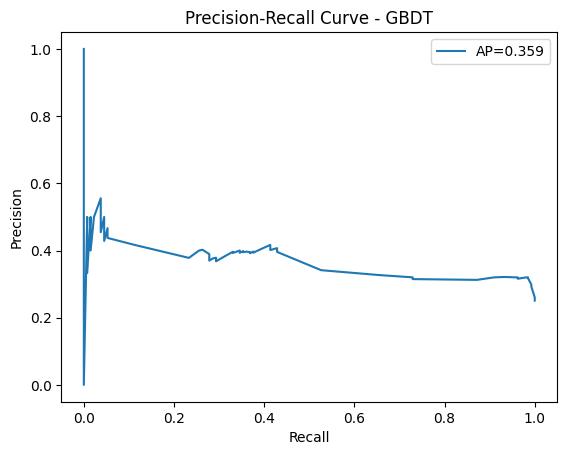


Best CV params: {'learning_rate': 0.05, 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'subsample': 0.85}
Best CV ROC AUC: 0.664
Test ROC AUC (best): 0.671

Top feature importances:
therapy_type_individual (minor)            0.4099
appt_type_talk therapy                     0.2528
intake_waitlist                            0.1074
age_35-40                                  0.0399
town_spotswood                             0.0277
town_hillsborough                          0.0257
age_70-75                                  0.0233
town_jersey city                           0.0184
town_englishtown                           0.0180
insurance_other                            0.0176
appt_type_talk therapy & med management    0.0141
insurance_bcbs                             0.0104
town_manalapan                             0.0098
age_30-35                                  0.0083
age_10-15                                  0.0059
location_princeton              

In [ ]:
# --- reuse the previous cell's 'data', X, y ---
# If you prefer to rebuild X/y here, do it consistently:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
)

# Start from 'data' created previously
df = data.copy()

# Keep the SAME target logic you used earlier (substring match for 'morning')
def map_time_slot(x):
    return 1 if "morning" in str(x).lower() else 0

df["is_morning"] = df["appt_time"].apply(map_time_slot)

# Feature columns (make sure these exist in df; adjust if needed)
categorical_cols = ["intake", "age", "town", "insurance", "location", "appt_type", "therapy_type"]
numeric_cols = ["duo_attendee"]

# Coerce types and fill missing
for c in categorical_cols:
    if c in df.columns:
        df[c] = df[c].fillna("unknown").astype(str).str.strip().str.lower()

for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# One-hot encode
use_cols = [c for c in categorical_cols if c in df.columns]
X_cat = pd.get_dummies(df[use_cols], drop_first=True)
X_num = df[numeric_cols].copy() if all(c in df.columns for c in numeric_cols) else pd.DataFrame(index=df.index)
X = pd.concat([X_cat, X_num], axis=1)

y = df["is_morning"].astype(int)

print("Feature matrix shape:", X.shape)
print("Target positive rate overall:", y.mean().round(3))

# ---- Train / test split
RANDOM_STATE = 123
TEST_SIZE = 0.33

# Ensure both classes exist for stratify
if y.nunique() < 2:
    raise ValueError("y has only one class. Need both morning and non-morning examples to train.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Positive rate (train): {y_train.mean():.3f} | Positive rate (test): {y_test.mean():.3f}")

# ---- Baseline GBDT
gbdt = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.9,
    random_state=RANDOM_STATE,
    validation_fraction=0.1,
    n_iter_no_change=5,
    tol=1e-4
)
gbdt.fit(X_train, y_train)

proba_test = gbdt.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print("\nBaseline performance")
print(f"ROC AUC: {roc_auc_score(y_test, proba_test):.3f}")
print(classification_report(y_test, pred_test, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - GBDT")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, proba_test)
plt.plot(fpr, tpr, label="GBDT")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GBDT")
plt.legend()
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, proba_test)
ap = average_precision_score(y_test, proba_test)
plt.plot(rec, prec, label=f"AP={ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - GBDT")
plt.legend()
plt.show()

# ---- Quick hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.02, 0.05, 0.1],
    "max_depth": [1, 2, 3],
    "subsample": [0.7, 0.85, 1.0],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt"]
}
gs = GridSearchCV(
    GradientBoostingClassifier(
        random_state=RANDOM_STATE,
        validation_fraction=0.1,
        n_iter_no_change=5,
        tol=1e-4
    ),
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)
gs.fit(X_train, y_train)
print("\nBest CV params:", gs.best_params_)
print(f"Best CV ROC AUC: {gs.best_score_:.3f}")

# Evaluate best on test
best = gs.best_estimator_
proba_best = best.predict_proba(X_test)[:, 1]
print("Test ROC AUC (best):", roc_auc_score(y_test, proba_best).round(3))

# Top feature importances
importances = pd.Series(best.feature_importances_, index=X.columns).sort_values(ascending=False)
topn = min(20, importances.shape[0])
print("\nTop feature importances:")
print(importances.head(topn).round(4))


Shape of feature matrix: (1606, 244)

Target distribution (0 = Not Morning, 1 = Morning):
is_morning
0    0.749689
1    0.250311
Name: proportion, dtype: float64
Training set shape: (1284, 244)
Testing set shape: (322, 244)
Logistic Regression model traiing complete
Generated predicitons
Accuracy: 0.7547
Log Loss: 0.5191

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       241
           1       0.58      0.09      0.15        81

    accuracy                           0.75       322
   macro avg       0.67      0.53      0.50       322
weighted avg       0.72      0.75      0.68       322



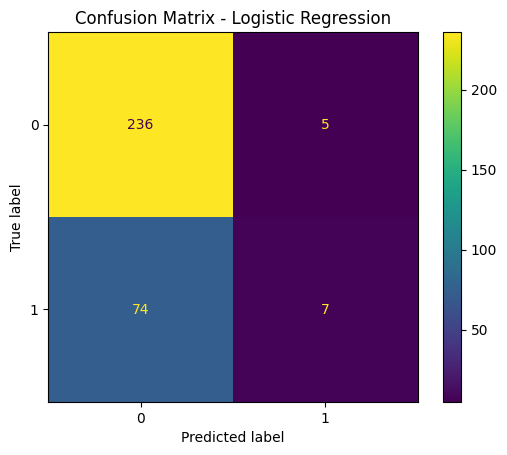

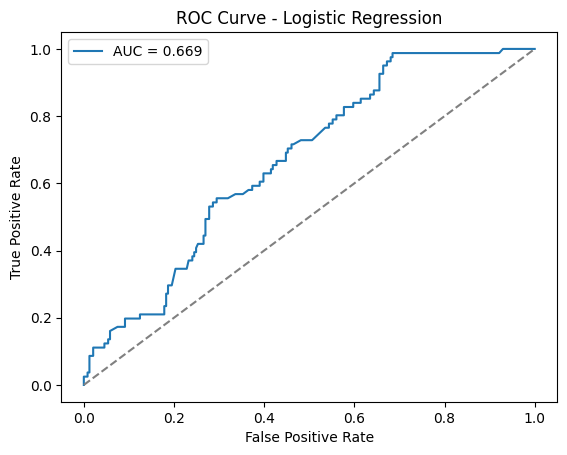

ROC AUC Score: 0.669

Top 10 features increasing morning likelihood:
                 Feature  Coefficient
200    town_tinton falls     1.421683
47     town_browns mills     1.219659
76      town_englishtown     1.092994
143       town_montclair     1.064556
145      town_morristown     1.029658
173  town_pompton plains     1.024391
183          town_rumson     1.020800
31         town_bayville     0.933115
21             age_70-75     0.904858
224       insurance_none     0.870706

Top 10 features decreasing morning likelihood:
                             Feature  Coefficient
64                  town_cream ridge    -0.658573
12                         age_30-35    -0.667659
163                          town_pa    -0.738886
16                          age_5-10    -0.748097
113                     town_keyport    -0.783815
118           town_lawrence township    -0.824689
8                          age_10-15    -0.954905
112                town_kendall park    -0.967798
242  therapy_ty

In [ ]:
# Logistic Regression Model (Predict the proability that a given appointment based on the clients demographics and referall details will be booked in the morning (9-12))
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
#Step 1. Prepare data This step was done above during in prevous code code but keeping consistent when looking at the logistic regression model
# y target -> column is_morning (1 = morning, 0 = none morning)
# x (features) -> all other columns, converted into numeric form

#Is it a morning appointment
y = data['is_morning']

#Dropping target + appt time
X = pd.get_dummies(data.drop(columns=['is_morning','appt_time']),drop_first=True)

print("Shape of feature matrix:", X.shape)
print("\nTarget distribution (0 = Not Morning, 1 = Morning):")
print(y.value_counts(normalize=True))

#Step 2. Splitting data into training and test sets
X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    test_size=0.2, #20% data for testing
    stratify = y, #keeps class balance (morning vs not morning)
    random_state = 42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#Step 3. Training the Logistic Regression Model

#Creating the LR model
log_model = LogisticRegression(max_iter=1000, solver='lbfgs')

#Train model on our trained data
log_model.fit(X_train, y_train)

print("Logistic Regression model traiing complete")

#Step 4. make our predictions

#Predict the class labels (0 or 1)
y_pred = log_model.predict(X_test)

#Predict the probabilities of each class (0 or 1)
y_pred_proba = log_model.predict_proba(X_test)

print("Generated predicitons")

#Step 5. Evaluating the model's performance metrics

#Basic performance metrics
accuracy = accuracy_score(y_test, y_pred) #This is our percent of correct predicitons
loss = log_loss(y_test, y_pred_proba) #Measure how confident the model is (The lower the better)
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {loss:.4f}")

#Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Step 6. Confusion Matrix
#Visualizing correct vs incorrect predicitons

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#Step 7. ROC curve and AUC Score
#We want to see how well the model separates the two classes.

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
print(f"ROC AUC Score: {auc:.3f}")

# Step 8. Feature Importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 features increasing morning likelihood:")
print(coef_df.head(10))
print("\nTop 10 features decreasing morning likelihood:")
print(coef_df.tail(10))
